The following is a notebook that takes a TESS simulated dataset and compares the outcome of 2D and 3D clustering. 

The dataset is first reduced to 3D, then that 3D rendering is reduced to 2D. 

It can be observed the the data "streams" interlace in 3d, which may cause them to be sliced when reduced down to 2D, causing them to form clusters that aren't actually distinct. 

This begs the question of what would happen to the data in other dimensions IE is there an equivalent "slicing" occuring when reducing from higher dimensions down to 3 dimensions that could lead to more clusters being found then are actually there. If so we would need a method for knowing how an accurate clustering looks. 

In [13]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD as TSVD
from sklearn.manifold import TSNE
import os
%matplotlib inline
import hdbscan
from mpl_toolkits.mplot3d import Axes3D


# load dataset
train = os.path.join('/home/tom/IdeaProjects/UTSCProjects/Three Planets With False Positives/TESS_simulated_lc_small.csv')

dataset = pd.read_csv(train, header=0, index_col=0)
dataset = dataset.reset_index()

Y = dataset['Ids']
X = dataset.iloc[0:, 1:]

plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

# modules for reduction 

tsvd = TSVD(n_components=50, n_iter=10000, algorithm='arpack')

tsne_2d = TSNE(n_components=2, n_iter=100000, n_iter_without_progress=1000, metric='manhattan',
               method='exact', learning_rate=1000)

tsne_3d = TSNE(n_components=3, n_iter=100000, n_iter_without_progress=1000, metric='manhattan',
               method='exact', learning_rate=1000)


#D3 reduction reduces the data set down to 3D for plotting 

D3_reduction = tsne_3d.fit_transform(tsvd.fit_transform(X))

#D2 then takes the 3D dataset and reduces it to two dimensions in order to comepare them 

D2_reduction = tsne_2d.fit_transform(D3_reduction)

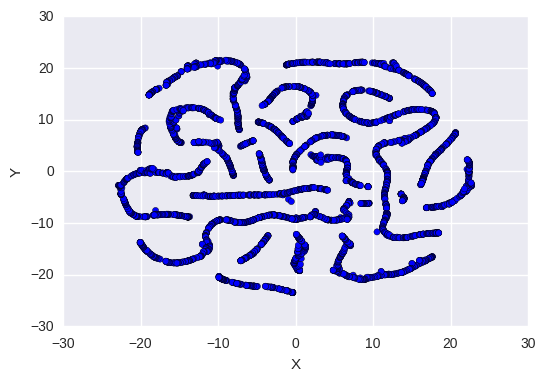

In [20]:
# scatter plotting the 2D dataset 

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(D2_reduction.T[0], D2_reduction.T[1])

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

found 13 clusters


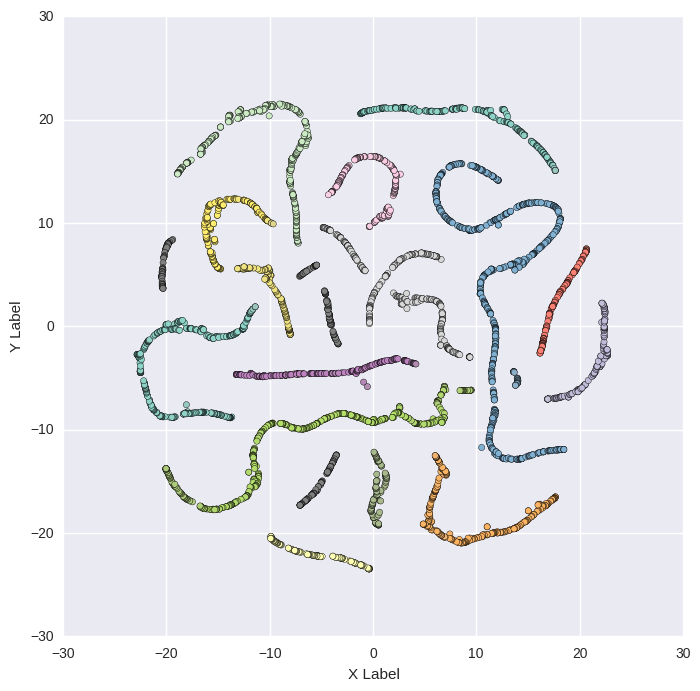

In [15]:
#initializing the clustering for 2D

clusterer = hdbscan.HDBSCAN(min_cluster_size = 125, min_samples=23).fit(D2_reduction)
n_clusters_ = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)


palette = sns.color_palette('Set3', n_colors=n_clusters_)
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (.5, .5, .5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]

# fig size and dpi allow to change figure sizes 
fig = plt.figure(figsize=(8,8), dpi=200)
ax = fig.add_subplot(111)
ax.scatter(D2_reduction.T[0], D2_reduction.T[1], c=cluster_colors)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

print 'found {0} clusters'.format(n_clusters_)
plt.show()



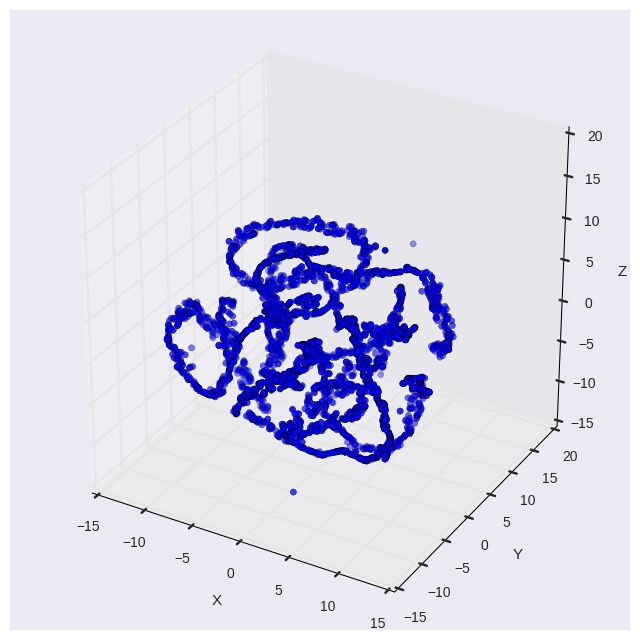

In [16]:
#now plotting the 3d rendering of the data

fig = plt.figure(figsize=(8,8), dpi=200)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(D3_reduction.T[0], D3_reduction.T[1], D3_reduction.T[2])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

found 7 clusters


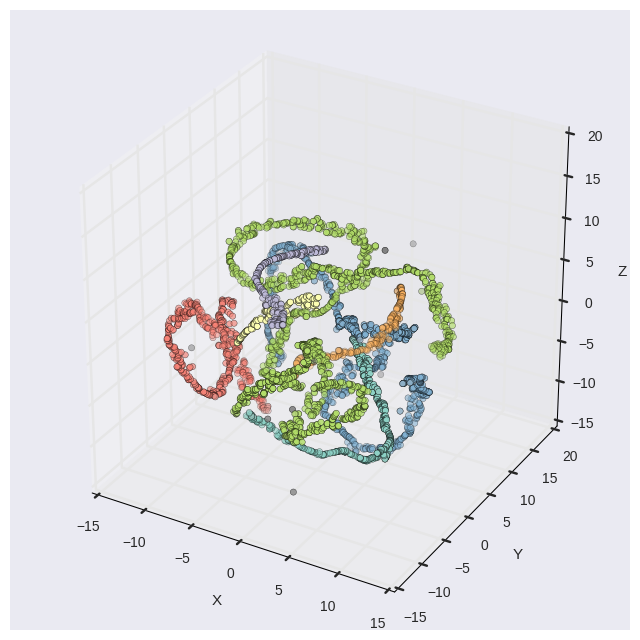

all done


In [17]:
#initializing the 3d clustering 

clusterer = hdbscan.HDBSCAN(min_cluster_size = 125, min_samples=23).fit(D3_reduction)
n_clusters_ = len(set(clusterer.labels_)) - (1 if -1 in clusterer.labels_ else 0)


palette = sns.color_palette('Set3', n_colors=n_clusters_)
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (.5, .5, .5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]

fig = plt.figure(figsize=(8,8), dpi=200)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(D3_reduction.T[0], D3_reduction.T[1], D3_reduction.T[2], c=cluster_colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

print 'found {0} clusters'.format(n_clusters_)

plt.show()

print 'all done'

While its hard to follow the individual streams we can see the clusters interweave, which may be causing the gaps and cluster separation in 2, cause HDBScan to find more clusters than are really there. 